In [1]:
# ALL IMPORTS
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches
import tensorflow as tf
import random
from random import randint
from random import shuffle
import librosa
import pickle

random.seed(42)

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

reset_graph()


In [2]:
# IMPORT AUDIO FILES AND MATCH LABELS/MNIST DATA TO EACH SAMPLE
Training_Data, Training_Label = pickle.load(open('preprocessedAudio_Training_MNIST.p', mode='rb'))
Validation_Data, Validation_Label = pickle.load(open('preprocessedAudio_Validation_MNIST.p', mode='rb'))
print("training samples")
print(len(Training_Data))
print("validation samples")
print(len(Validation_Data))

training samples
20116
validation samples
3549


          ['    0', '    1', '    2', '    3', '    4', '    5', '    6', '    7', '    8', '    9']
Training  ['10.05%', '10.14%', '10.08%', '9.92%', '10.01%', '9.95%', '10.01%', '9.87%', '9.94%', '10.05%']
Validation ['9.33%', '8.96%', '9.72%', '10.40%', '10.06%', '10.57%', '10.03%', '10.43%', '10.54%', '9.97%']


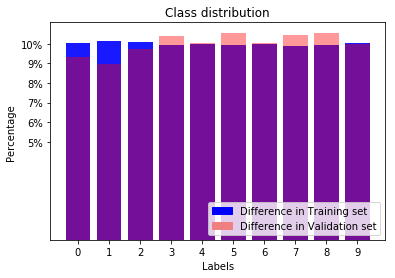

In [3]:

### Create graph for class distribution
print("         ",['    {:}'.format(i) for i in range(0,10)] )

newPercData = np.divide(np.sum(Training_Label, axis=0),len(Training_Label))*100
a = [float('{:.2f}'.format(i)) for i in newPercData] 
print("Training ",['{:.2f}%'.format(i) for i in newPercData] )

newPercData = np.divide(np.sum(Validation_Label, axis=0),len(Validation_Label))*100
print("Validation",['{:.2f}%'.format(i) for i in newPercData] )
b = [float('{:.2f}'.format(i)) for i in newPercData] 

x = np.arange(10)
plt.bar(x, height= a, alpha=0.9, color='b') 
plt.bar(x, height= b, alpha=0.4, color='r') 
plt.xticks(x, np.arange(10)) # no need to add .5 anymore

yn = np.arange(5,11)
plt.yticks(yn, np.arange(5,11)) # no need to add .5 anymore

plt.title('Class distribution')
plt.xlabel('Labels')
plt.ylabel('Percentage ')

blue = mpatches.Patch(color='blue', label='Difference in Training set')
red = mpatches.Patch(color='lightcoral', label='Difference in Validation set')

plt.legend(handles=[blue,red], loc=4)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()]) 
#plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)
plt.show()
# Get percentages


In [4]:
# FIND MATCHING MNIST IMAGES
# DOWNLOAD MNIST FROM TENSORFLOW
from tensorflow.examples.tutorials.mnist import input_data as mnist_data
mnist = mnist_data.read_data_sets("/tmp/data/", one_hot=True)

# MATCH A RANDOM LABEL FROM MNIST TO AUDIO LABEL
mnist_fit_audio_train = []
mnist_fit_audio_valid = []
train_used_indexes = []


mnist_fit_audio_train_l = []
mnist_fit_audio_valid_l = []
valid_used_indexes = []


for i in range(len(Training_Label)):
    
    label_to_find = np.argmax(Training_Label[i])
    found_label = None
    while(found_label == None):
        r = randint(0, len(mnist.train.labels)-1)
        if(np.argmax(mnist.train.labels[r]) == label_to_find):
            if(r not in train_used_indexes):
                found_label = r
    
    mnist_fit_audio_train.append(mnist.train.images[found_label])
    mnist_fit_audio_train_l.append(Training_Label[i])
    train_used_indexes.append(found_label)

for i in range(len(Validation_Label)):
    
    label_to_find = np.argmax(Validation_Label[i])
    found_label = None
    while(found_label == None):
        r = randint(0, len(mnist.test.labels)-1)
        if(np.argmax(mnist.test.labels[r]) == label_to_find):
            if(r not in valid_used_indexes):
                found_label = r
    
    mnist_fit_audio_valid.append(mnist.test.images[found_label])
    mnist_fit_audio_valid_l.append(Validation_Label[i])
    valid_used_indexes.append(found_label)
    #mnist.test.labels[found_label] = -1
    
print("Matching labels done")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Matching labels done


In [5]:
# CONFIRM THE DIMENSIONS ARE THE SAME
t_cnt = 0
for i in range(len(Training_Label)):
    if(np.argmax(Training_Label[i]) == np.argmax(mnist_fit_audio_train_l[i])):
        t_cnt += 1
print(t_cnt)  
v_cnt = 0
for i in range(len(Validation_Label)):
    if(np.argmax(Validation_Label[i]) == np.argmax(mnist_fit_audio_valid_l[i])):
        v_cnt += 1    
print(v_cnt)  

20116
3549


In [6]:
# CONFIRM THE DIMENSIONS ARE THE SAME
t_cnt = 0
for i in range(len(Training_Label)):
    if(np.argmax(Training_Label[i]) == 0):
        t_cnt += 1
print(t_cnt)  
v_cnt = 0
for i in range(len(Validation_Label)):
    if(np.argmax(Validation_Label[i]) ==0):
        v_cnt += 1    
print(v_cnt)  

2021
331


7


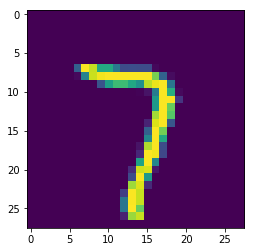

1


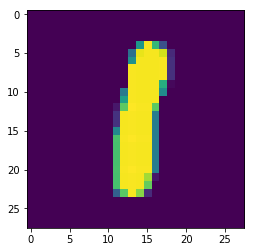

3


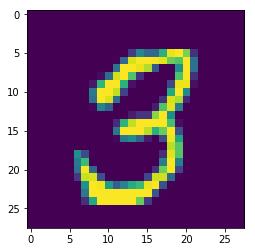

In [7]:
from matplotlib import pyplot as plt
# PRINT OUT SOME OF THE IMAGES FROM MNIST

def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    return plt
# RANDOM 15 images
for i in range(3):
    nnn = i #randint(0, len(mnist_fit_audio_train)-1)
    print(np.argmax(mnist_fit_audio_train_l[nnn]))
    gen_image(mnist_fit_audio_train[nnn]).show()


In [8]:
# GENEREATE TEXTUAL DESCRIPTION
labels = [0,1,2,3,4,5,6,7,8,9]

synonym = [
    ["zero","nil","blank","nada","naught","nix","nobody","nonentity","nullity","void","lowest", "ought","zot"],
    ["one","particular","separate","single","singular","sole","solitary","alone","lone","odd","only","peculiar","unique"],
    ["two","binary","diploid","binal","bipartisan","bipartite","bisected","distichous","dual","dualistic"],
    ["three", "ternary","third","trilateral","trinitarian","triple","pyramidal","triangular","trigonal","trinal","trinary","tripartite"],
    ["four", "quadruple","quadruplicate","quarter","quadrigeminal","quadripartite","quadrivial","quaternate"],
    ["five", "quintuple","pentagonal","pentamerous","quinary","quinate","quinquennial"],
    ["six", "hexadic","hexagonal","semestral","senary","sextuple"],
    ["seven", "septenary","septemviral","septennial","septuple"],
    ["eight", "octadic","octagonal","octennial"],
    ["nine", "ninth","nonagon","enneadic","novenary"]
]
# ALL Numerical phrases
#https://www.phrases.org.uk/meanings/number-phrases.html

phrases = [
    "A bunch of [NUM]",
    "A picture is worth a [NUM] words",
    "A stitch in time saves [NUM]",
    "For all and [NUM]",
    "Back to square [NUM]",
    "Baker's [NUM]",
    "Behind the [NUM] ball",
    "Better [NUM]",
    "Between [NUM] stools",
    "Catch [NUM]",
    "Cheap at [NUM] the price",
    "Cloud [NUM]",
    "[NUM] Dutch",
    "[NUM] whammy",
    "Dressed to the [NUM]",
    "[NUM] minutes of fame",
    "[NUM] column",
    "[NUM] corners of the earth",
    "Genius is [NUM] percent inspiration",
    "Goody [NUM]-shoes",
    "[NUM] inch",
    "[NUM]-cocked",
    "[NUM]-hearted",
    "[NUM] trick",
    "[NUM] five",
    "Hung, drawn and [NUM]",
    "Life begins at [NUM]",
    "[NUM] days' wonder",
    "No [NUM] given",
    "[NUM] points",
    "On cloud [NUM]",
    "[NUM] over me",
    "[NUM] stop shop",
    "[NUM]-hit wonder",
    "Richard the [NUM]",
    "[NUM]-year itch",
    "The [NUM] degree",
    "The whole [NUM] yards",
    "[NUM] time lucky",
    "[NUM] score ",
    "[NUM] sheets to the wind",
    "[NUM] strikes and you are out",
    "[NUM] for skidoo",
    "[NUM] cents worth",
    "[NUM] heads are better",
    "[NUM] tolerance"
]

In [9]:

import pandas as pd

MNIST_TEXT_TRAIN = []
MNIST_TEXT_TRAIN_NOISE = []
MNIST_TEXT_VALID = []

for i in range(len(Training_Label)):
    # Pick a random label
    r_gen = np.argmax(Training_Label[i])
    # Pick a random phrases
    s_gen = randint(0,len(phrases)-1)
    # pick random word for label
    w_gen = randint(0,len(synonym[r_gen])-1)
    word = synonym[r_gen][w_gen]
    MNIST_TEXT_TRAIN.append( [phrases[s_gen].replace("[NUM]",word), r_gen])

for i in range(len(Validation_Label)):
    # select data label
    r_gen = np.argmax(Validation_Label[i])
    # Pick a random phrases
    s_gen = randint(0,len(phrases)-1)
    # pick random word for label
    w_gen = randint(0,len(synonym[r_gen])-1)
    word = synonym[r_gen][w_gen]
    MNIST_TEXT_VALID.append( [phrases[s_gen].replace("[NUM]",word), r_gen])

In [10]:
from IPython.display import display, HTML

# Set them to dictionary
trainData = pd.DataFrame(MNIST_TEXT_TRAIN,columns=['text', 'label'])
validData = pd.DataFrame(MNIST_TEXT_VALID,columns=['text', 'label'])

# Confirm length of them
print(len(trainData))
print(len(validData))

# Display the first 2 of every class
for i in range(10):
    display(trainData.loc[trainData['label'] == i][0:2])  

20116
3549


,text,label
32,void sheets to the wind,0
45,nil corners of the earth,0


,text,label
1,particular stop shop,1
14,particular-year itch,1


,text,label
7,dualistic tolerance,2
18,diploid inch,2


,text,label
2,trilateral for skidoo,3
4,Between trilateral stools,3


,text,label
3,Richard the quaternate,4
12,quadrigeminal sheets to the wind,4


,text,label
17,five five,5
28,quinquennial-year itch,5


,text,label
10,No hexadic given,6
23,sextuple five,6


,text,label
0,seven-hearted,7
5,"Hung, drawn and septuple",7


,text,label
8,octennial stop shop,8
11,octagonal corners of the earth,8


,text,label
6,ninth Dutch,9
29,Better ninth,9


In [12]:
## STACK AUDIO, IMAGE, AND TEXTUAL DESCRIPTION IN ONE ARRAY
# AUDIO, IMAGE, TEXT, ONE-HOT REPRESENTATION, LABEL
MNIST_TRAINING_SET = [
    Training_Data,           # (20116, 128, 44, 1)
    mnist_fit_audio_train,   # (20116, 784)
    trainData['text'],       # (20116,)
    Training_Label,          # (20116, 10)
    trainData['label']       # (20116,)
]

MNIST_VALIDATION_SET = [
    Validation_Data,         # (3549, 128, 44, 1)
    mnist_fit_audio_valid,   # (3549, 784)
    validData['text'],       # (3549,)
    Validation_Label,        # (3549, 10)
    validData['label']       # (3549,)
]


Showing sample number 0 label 3


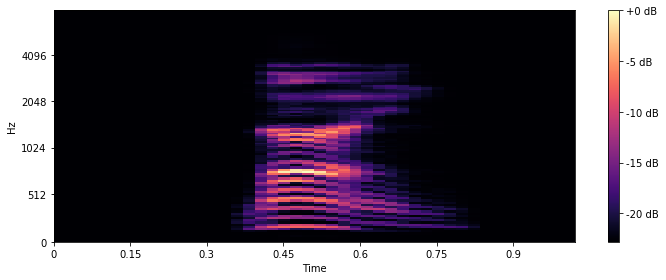

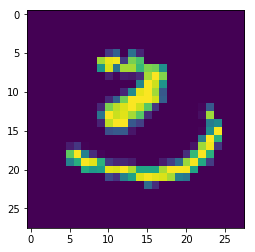

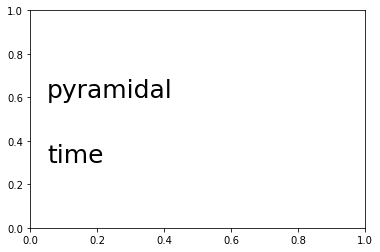

Showing sample number 1 label 9


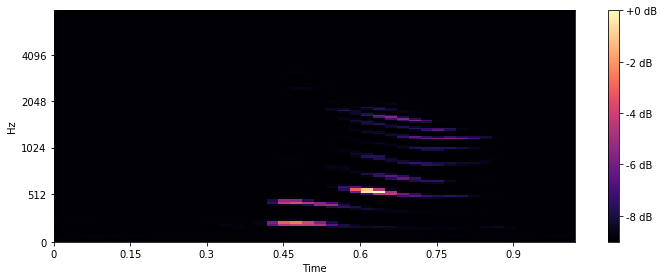

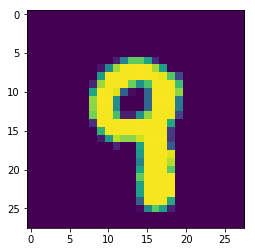

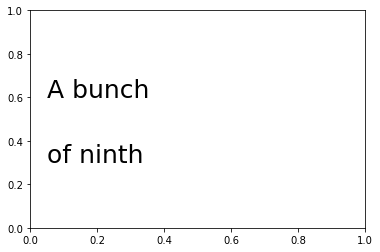

Showing sample number 2 label 8


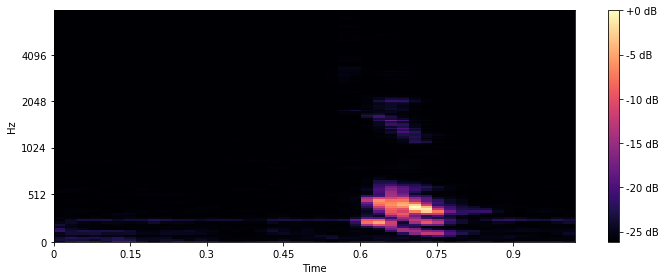

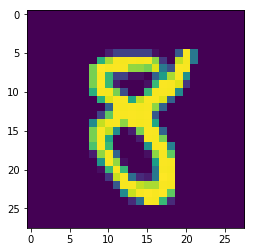

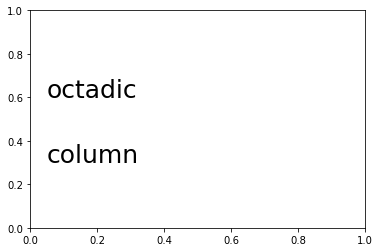

In [17]:
# FUNCTION TO DISPLAY A SAMPLE OF AUDIO, IMAGE, AND TEXTUAL DESCRIPTION
import librosa.display
def plotNormalizedSpectrogram(normalizedSpecto):
    plt.figure(figsize=(10, 4))
    spectrogramData = normalizedSpecto
    librosa.display.specshow(librosa.power_to_db(spectrogramData, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()

def plotDescription(dispText):
    plt.figure()    
    ax = plt.subplot(111)
    textArr = dispText.split(' ')
    lenTextMid = int(len(textArr) / 2)
    
    t = plt.text(0.05, 0.6, ' '.join(textArr[0:lenTextMid]), transform=ax.transAxes, fontsize=25)
    t = plt.text(0.05, 0.3, ' '.join(textArr[lenTextMid:lenTextMid*2]), transform=ax.transAxes, fontsize=25)

    plt.show()
    
def displaySample(dataSet, n):
    audio = np.reshape(dataSet[0][n], [128,44 ])
    image = dataSet[1][n]
    text = dataSet[2][n]
    real_label = dataSet[4][n]

    print("Showing sample number",n,"label",real_label)
    plotNormalizedSpectrogram(audio)
    gen_image(image).show()
    plotDescription(text)


displaySample(MNIST_VALIDATION_SET,0)
displaySample(MNIST_VALIDATION_SET,1)
displaySample(MNIST_VALIDATION_SET,2)



In [18]:

doSave = False
# SAVE MMNIST TRAINING AND VALIDATION
if(doSave):
    print("Saving new data...")
    pickle.dump((MNIST_TRAINING_SET), open('Training_MMNIST.p', 'wb'))
    pickle.dump((MNIST_VALIDATION_SET), open('Validation_MMNIST.p', 'wb'))
    print("Save completed!")